# Feature Scaling and Normalization in Data Preprocessing

# 1. Standard Scaling
Standard Scaling ka matlab hai ke data ko normalize karna, jisse har feature ek common scale par aa jaye. Yeh scaling technique data ko mean = 0 aur standard deviation = 1 par transform karti hai.

    Formula:

𝑧 = 𝑥 − 𝜇 / 𝜎

Kab Use Karna Chahiye?

    Jab Data Normally Distributed Ho:

Agar data ka distribution normal (bell-shaped) ho, toh standard scaling zyada effective hoti hai.

    Algorithm Sensitive to Scale:

Algorithms jese SVM, KNN, K-Means Clustering, aur Principal Component Analysis (PCA) require karte hain ke data scaled ho.

    Multiple Features with Different Ranges:

Jab dataset me alag-alag features ka range bohot different ho, scaling zaroori hoti hai.
​
 


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [3]:
data = {
    "Age": [25, 30, 35, 40, 45],
    "Income": [30000, 40000, 50000, 60000, 70000]
}
df = pd.DataFrame(data)
df

,Age,Income
0,25,30000
1,30,40000
2,35,50000
3,40,60000
4,45,70000


In [5]:
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [8]:
dt = pd.DataFrame(scaler_df, columns=df.columns)
dt

,Age,Income
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


# 2. MinMax Scaling 
Min-Max Scaling ka matlab hai data ko ek specific range (e.g., 0 to 1) mein transform karna. Iska goal hai ke sab values same scale par aa jayein, jo data analysis aur machine learning algorithms ke liye zaruri hota hai.

Formula

𝑥(scaled) = 𝑥 − 𝑥(min) /  𝑥(max) − 𝑥(min)

​Why Use Min-Max Scaling?

    Range Ko Fix Karna:

Min-Max Scaling values ko ek defined range (0-1 ya 0-100) mein laata hai.

Yeh tab zaruri hota hai jab range important ho (e.g., image processing mein pixel values).

    Machine Learning Models ke liye Zaroori:

Models jese KNN, SVM, aur Neural Networks me scaling zaroori hoti hai. Bina scaling ke, bade range wale features dominate kar lete hain.

    Data Normalization:

Har feature ko ek uniform scale pe laata hai, jisse algorithms better perform karte hain.

    Outliers Ka Kam Asar:

Standard Scaling outliers se zyada affect hoti hai, lekin Min-Max Scaling ka asar relatively kam hota hai.

Kab Use Karna Chahiye?

    Jab Features Ke Ranges Bohot Alag Ho:

Example: Ek feature Age (20-60) aur doosra Income (1000-1000000) ho, toh Min-Max Scaling zaroori hai.

    Jab Data Predefined Range Mein Hona Chahiye:

Example: Pixel intensity values ko 0-1 ke range mein laana for image processing.

    Gradient Descent-Based Models:

Neural Networks aur Deep Learning models me Min-Max Scaling zyada effective hoti hai.

    Data Not Normally Distributed:

Agar data normal distribution mein nahi hai, toh Min-Max Scaling standard scaling se behtar hoti hai.
 
​


In [10]:
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [11]:
da = pd.DataFrame(scaler_df, columns=df.columns)
da

,Age,Income
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


# 3. MaxAbs Scaler
Max Absolute Scaling ek scaling technique hai jo data ko feature-wise normalize karta hai, aur har feature ki absolute maximum value ko 1 banata hai. Yeh scaling data sparsity ko maintain karta hai, aur isme values negative bhi reh sakti hain.

Formula

𝑥(scaled) = 𝑥 ∣ 𝑥(max)

​Why Use Max Absolute Scaling?

    For Sparse Data:

Jab dataset me bohot saare zeroes ho (e.g., one-hot encoded features), tab Max Absolute Scaling useful hota hai.

Scaling ke baad bhi sparsity (zeros) maintained rehti hai.

    Preserves Negative Values:

Agar dataset me negative values hain (e.g., temperature differences), toh Max Absolute Scaling unhe distort nahi karta. Negative values ka scale negative hi rehta hai.

    Simple Normalization:

Formula simple hai aur directly maximum value ka ratio calculate karta hai. Isme mean ya standard deviation ki zarurat nahi hoti.

Kab Use Karna Chahiye?

    Sparse Data Handling:

Jab tumhara dataset sparse ho (bohot saare zeroes ho), toh Max Absolute Scaling best hai.

Example: One-hot encoded features ya text data ke embeddings.

    Sign Retention:

Jab tumhara data negative aur positive values ka combination ho, aur tumhe sign (negative ya positive) preserve karna ho.

    Not Sensitive to Distribution:

Jab data normal distribution follow nahi karta, tab bhi yeh scaling kaam karta hai.


In [12]:
scaler = MaxAbsScaler()
scaler_df = scaler.fit_transform(df)
scaler_df

array([[0.55555556, 0.42857143],
       [0.66666667, 0.57142857],
       [0.77777778, 0.71428571],
       [0.88888889, 0.85714286],
       [1.        , 1.        ]])

In [13]:
daa = pd.DataFrame(scaler_df, columns=df.columns)
daa

,Age,Income
0,0.555556,0.428571
1,0.666667,0.571429
2,0.777778,0.714286
3,0.888889,0.857143
4,1.000000,1.000000


# Difference between all of them...
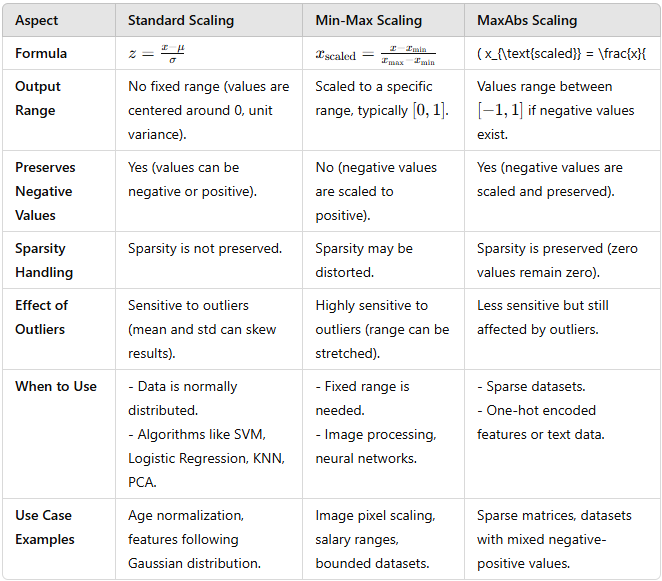

![scaling difference.png](<attachment:scaling difference.png>)

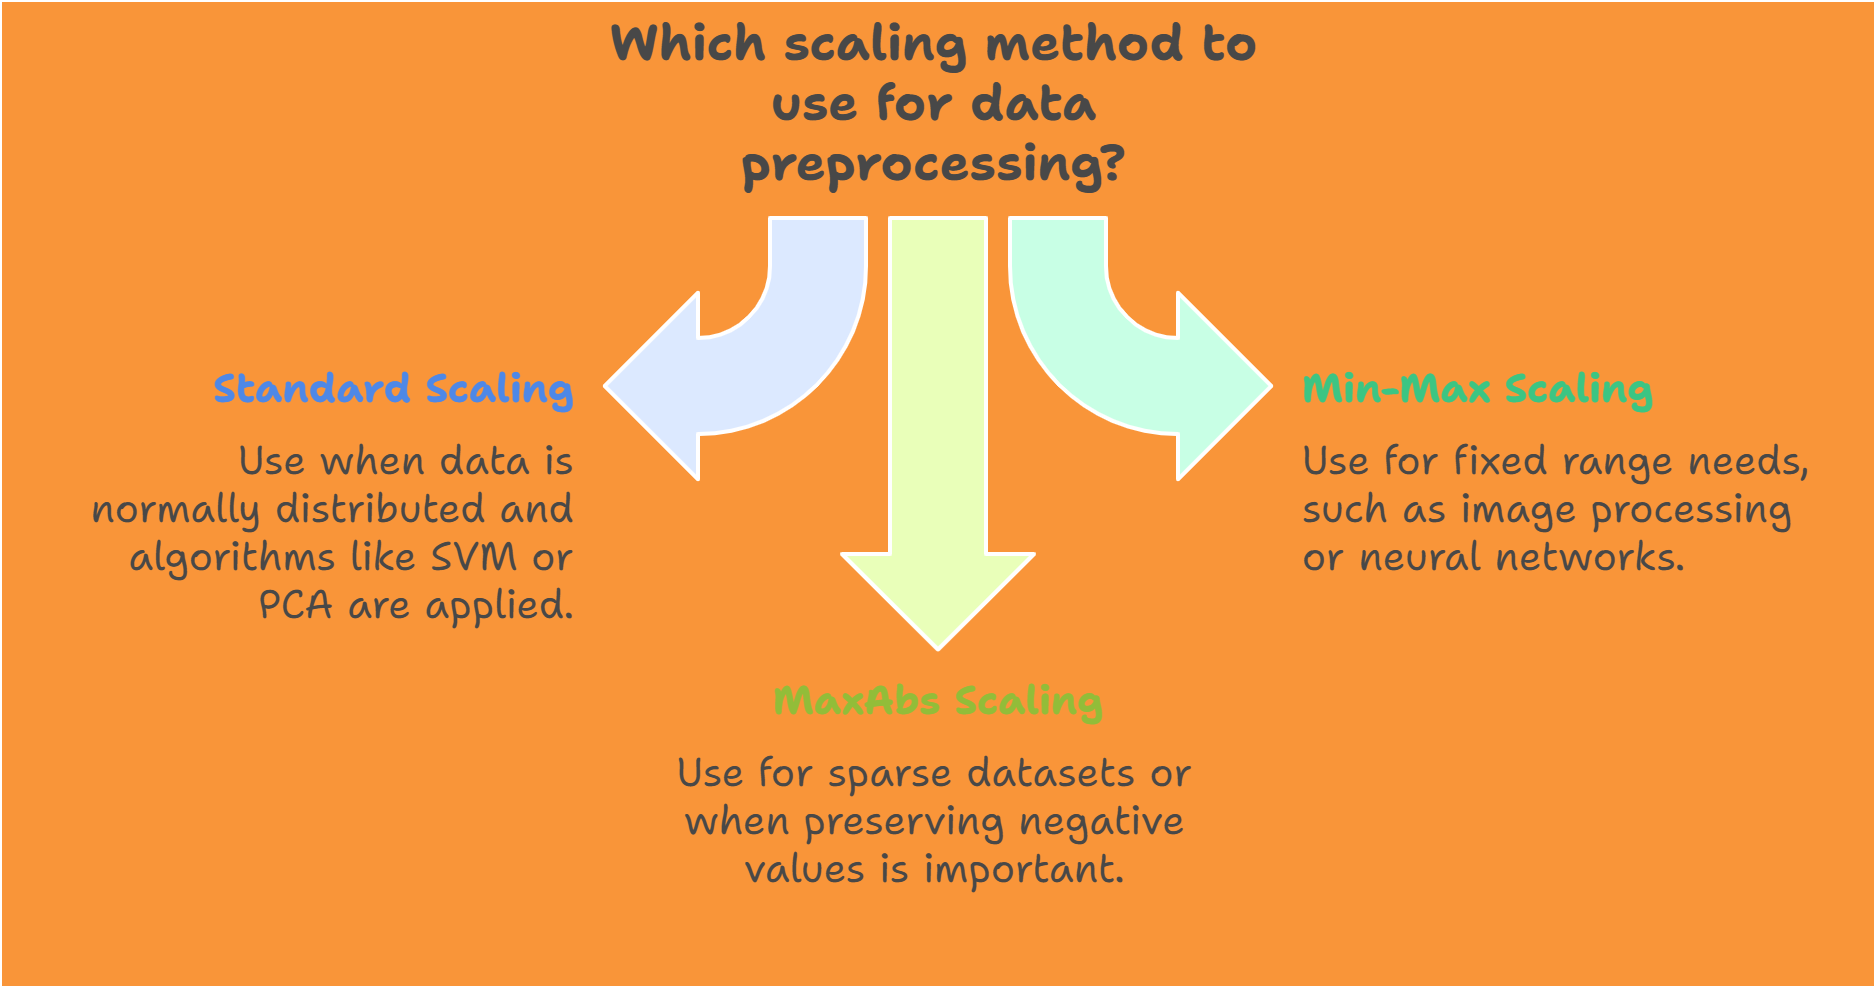